In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Different stages in Scikit Learn

    1) Get Data Ready
    2) Pick a model
    3) Fit the model to the data and make a prediction
    4) Evaluate the model
    5) Improve through Experimentation
    6) Save and reload the trained data

In [178]:
What_we_covered=['1) Get Data Ready',
    '2) Pick a model',
    '3) Fit the model to the data and make a prediction',
    '4) Evaluate the model',
    '5) Improve through Experimentation',
    '6) Save and reload the trained data']

In [179]:
What_we_covered

['1) Get Data Ready',
 '2) Pick a model',
 '3) Fit the model to the data and make a prediction',
 '4) Evaluate the model',
 '5) Improve through Experimentation',
 '6) Save and reload the trained data']

# end to end scikit learn workflow

In [180]:
heart=pd.read_csv('heart-disease.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Get the data

In [181]:
# Features matrix
x=heart.drop('target',axis=1) # Selecting all the variables as features, except the target which is dependent variable

# labels
y=heart['target'] # Selecting the target as the label or output

# Choosing a model and hyperparameters ( we can tune the model)

In [182]:
from sklearn.ensemble import RandomForestClassifier # Importing Classification model( random forest )
clf=RandomForestClassifier() #clf--> classifier

In [183]:
# we will use default parameters for hyperparameter tuning
# we can check the parameters using 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Fitting the model to training Data

In [184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [185]:
clf.fit(x_train,y_train)

RandomForestClassifier()

# Make a prediction

In [186]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3


In [187]:
y_label=clf.predict(x_test)
y_label

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [188]:
y_test

175    0
49     1
179    0
136    1
226    0
      ..
182    0
160    1
117    1
229    0
154    1
Name: target, Length: 61, dtype: int64

# Evaluate the Model on training and test data

In [189]:
clf.score(x_train,y_train) # Score gives us the accuracy

1.0

In [190]:
clf.score(x_test,y_test)

0.7704918032786885

# We can also check metrics other than accuracy

In [191]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [192]:
print(classification_report(y_test,y_label))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.73      0.83      0.77        29

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [193]:
confusion_matrix(y_test,y_label)

array([[23,  9],
       [ 5, 24]], dtype=int64)

In [194]:
accuracy_score(y_test,y_label)

0.7704918032786885

# Improve the Model (We can change the N-estimators)

In [195]:
np.random.seed(42) # seeding the random values
for i in range(10,100,10):
    print(f'Trying Model with {i} estimators')
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train) # fitting with train data
    print(f'Model Accuracy on test set:{clf.score(x_test,y_test)*100:.2f}%') # getting accuracy based on test data
    print(' ')

Trying Model with 10 estimators
Model Accuracy on test set:70.49%
 
Trying Model with 20 estimators
Model Accuracy on test set:73.77%
 
Trying Model with 30 estimators
Model Accuracy on test set:77.05%
 
Trying Model with 40 estimators
Model Accuracy on test set:72.13%
 
Trying Model with 50 estimators
Model Accuracy on test set:73.77%
 
Trying Model with 60 estimators
Model Accuracy on test set:73.77%
 
Trying Model with 70 estimators
Model Accuracy on test set:78.69%
 
Trying Model with 80 estimators
Model Accuracy on test set:75.41%
 
Trying Model with 90 estimators
Model Accuracy on test set:73.77%
 


# Save and Reload the trained data

In [196]:
# we can do it using Pickle Library
import pickle # syntax for the Pickle Library
pickle.dump(clf,open('RandomForest_heart_Disease.pkl','wb')) #wb--> write Binary

In [197]:
#We can retreive the loaded model
loaded_model=pickle.load(open('RandomForest_heart_Disease.pkl','rb')) #rb--> read binary
loaded_model.score(x_test,y_test)

0.7377049180327869

# Category values to Numerical Values
   We can change the categorical values to Numerical by two ways:
   1) One Hot Encoder
     2) Get Dummies Method

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
car_sales=pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [200]:
x=car_sales.drop('Price',axis=1)
y=car_sales['Price']

In [201]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [202]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [203]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 90,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Now turn the categories into Numbers

# One Hot Encoder Method

In [204]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# now we need to define the categorical values
cat_values=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one hot',one_hot,cat_values)],remainder='passthrough')
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [205]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


# Get Dummies Method

In [206]:
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [207]:
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.25)
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [208]:
model.score(x_train,y_train)

1.0

In [209]:
model.score(x_test,y_test)

0.0

# Now we can check for the missing values

# There are two ways we can deal with the missing data
    1) we can fill them (Imputing)
    2) We can remove the samples which contains the missing data

In [210]:
car_sales_new=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_new

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [211]:
car_sales_new.isna().sum() # to list the sum of all the missing values in each columns

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [212]:
car_sales_new['Make'].fillna('missing',inplace=True)# To fill values in place of NAN
car_sales_new['Colour'].fillna('missing',inplace=True)
car_sales_new['Odometer (KM)'].fillna(car_sales_new['Odometer (KM)'].mean(),inplace=True)
car_sales_new['Doors'].fillna(4,inplace=True)

# We have to always check while filling the misising values whether we need to add as string or int or float

In [213]:
car_sales_new.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [214]:
# getting our features and targets
x=car_sales_new.drop('Price',axis=1)
y=car_sales_new['Price']

In [215]:
# Now we will drop the rest of the NaN values in Price using dropna method
car_sales_new.dropna(inplace=True)
len(car_sales_new)

950

In [216]:
x=car_sales_new.drop('Price',axis=1)
y=car_sales_new['Price']

In [217]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# now we need to define the categorical values
cat_values=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one hot',one_hot,cat_values)],remainder='passthrough')
transformed_x=transformer.fit_transform(car_sales_new)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [218]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [219]:
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.25)
model.fit(x_train,y_train)

RandomForestClassifier()

In [220]:
model.score(x_train,y_train)

1.0

In [221]:
model.score(x_test,y_test)

0.0

# We can also fill missing values using only Sklearn

In [222]:
# Here we will use only sklearn
car_sales_renew=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_renew

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [223]:
car_sales_renew.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# Choosing a right model

# Let us create a model based on sklearn machine learning map...(https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
# Lets us import inbuilt Boston Dataset

In [224]:
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [225]:
# Here we got two arrays data and targets
# Let us convert it to dataframe

In [226]:
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [227]:
boston_df['targets']=pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,targets
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [228]:
# Now we follow the chart to build the right model
len(boston_df)

506

In [229]:
# Here we have less than 100k samples so we use ridge regression

# Ridge regression model
from sklearn.linear_model import Ridge

# create the random seed
np.random.seed(42)

# create the data by getting the features from the data frames
x=boston_df.drop('targets',axis=1)
y=boston_df['targets']

# creating the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate Ridge model
model=Ridge()
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.6662221670168522

In [230]:
# we can always improve the model
# Here in this case we can check for the Ensemble Regressor for the same Data

# Checking with the Ensemble Regressor

In [231]:
# We can check with the Random Forest since it is one of the most famous ensemble regressor

In [232]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# create the random seed
np.random.seed(42)

# create the data by getting the features from the data frames
x=boston_df.drop('targets',axis=1)
y=boston_df['targets']

# creating the train test split ( Since we already loaded it earlier we can ignore this)
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate Ridge model
model1=RandomForestRegressor()
model1.fit(x_train,y_train)

model1.score(x_test,y_test)

0.8922527442109116

In [233]:
# This is much better, we can compare the results
model.score(x_test,y_test)

0.6662221670168522

# Choosing and estimating for the Classification
   Lets check the map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [234]:
# Now let us take the heart disease example, since it is based on classification
hd=pd.read_csv('heart-disease.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [235]:
# check the no of samples
len(hd)

303

In [236]:
#samples less than 100k, so we use Linear SVC classification

# Linear SVC model
from sklearn.svm import LinearSVC

# create the random seed
np.random.seed(42)

# create the data by getting the features from the data frames
x=hd.drop('target',axis=1)
y=hd['target']

# creating the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate Ridge model
model=LinearSVC(max_iter=1000000)
model.fit(x_train,y_train)

model.score(x_test,y_test)

C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [237]:
# lets try the same with the ensemble Classifier

# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# create the random seed
np.random.seed(42)

# create the data by getting the features from the data frames
x=hd.drop('target',axis=1)
y=hd['target']

# creating the train test split ( Since we already loaded it earlier we can ignore this)
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate Ridge model
clf=RandomForestClassifier()

# Fitting the model
clf.fit(x_train,y_train)

# Evaluating the model
clf.score(x_test,y_test)

0.8360655737704918

In [238]:
# Hence we can compare which one is the best

# 1) If we have structured data, we have to use ensemble methods
# 2) If we have Unstructured data, we have to use deep learning or transfer learning

### making predictions in our model
We can make predictions as below:
1. 'predict()'
2. 'predict_proba()'

In [239]:
# let us check predict() first
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [240]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [241]:
# Comparing our results to evaluate the model

y_predict=clf.predict(x_test)
np.mean(y_predict== y_test)

0.8360655737704918

In [242]:
clf.score(x_test,y_test)

0.8360655737704918

In [243]:
# We can also check accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.8360655737704918

In [244]:
# we can see all these are same

# Now lets us find what is predict_proba()

In [245]:
clf.predict_proba(x_test)[:10]
# this is basically the probability, we can see if the left one is greater then it is 0, else 1

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79],
       [0.16, 0.84],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.53, 0.47]])

# Evaluating a Machine Learning Model

There are three ways to evaluate the sklearn model
* Estimator `Score` Method
* The `Scoring` parameter
* Using different `Metrics`

### We can check the methods here...https://scikit-learn.org/stable/modules/model_evaluation.html

# a) Evaluating using score method

In [246]:
# Let us get the model first
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
hd=pd.read_csv('heart-disease.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [247]:
# geting the data
x=hd.drop('target',axis=1)
y=hd['target']

In [248]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#fit the data
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

#Evaluating the model
clf.score(x_test,y_test)

0.8524590163934426

In [249]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [250]:
x=hd.drop('target',axis=1)
y=hd['target']

np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8524590163934426

In [251]:
pp=cross_val_score(clf,x,y,cv=5) 
pp

# cross validation checks for all the probable test sizes based on the number of cross validation count( which is 'cv')

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [252]:
clf_cross_val_score=np.mean(pp) # this the score when we evaluate using the scoring method

clf_cross_val_score

0.811639344262295

In [253]:
# we can compare the two results

clf.score(x_test,y_test),clf_cross_val_score

(0.8524590163934426, 0.811639344262295)

### Evaluating the model using the metrics
Here there are different sub categories

1. Accuracy
2. Area under the ROC Curve
3. confusion matrix
4. classification report

# Accuracy

In [254]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x=hd.drop('target',axis=1)
y=hd['target']

np.random.seed(42)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(x_train,y_train)

cvs=cross_val_score(clf,x,y,cv=5)

cross_val_score=np.mean(cvs)
cross_val_score # This the final accuracy we have obtained

0.811639344262295

In [255]:
# We can fancy this by writing
print(f'The percentage of heart disease is:{cross_val_score*100:.2f}%')

The percentage of heart disease is:81.16%


### We always need to check other results before finalising

# Area under the ROC Curve

### ROC- Receiver operating characteristic curve

* ROC curves are a comparision of model's true positive rate (tpr) and false positive rate (fpr)
* True Positive = model predicts `1` when truth is `1`
* False Positive= model predicts `1` when truth is `0`
* True Negative= model predicts `0` when truth is `0`
* False Negative= model predicts `0` when truth is `1`

In [256]:
# Getting pur model ready
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8524590163934426

In [257]:
y_proba=clf.predict_proba(x_test)
y_proba[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [258]:
# we need only 1's, hence we can use slicing here
y_proba_positive=y_proba[:,1]
y_proba_positive[:5]

array([0.11, 0.51, 0.57, 0.16, 0.82])

In [259]:
# plotting the roc curve
fpr,tpr,thresholds=roc_curve(y_test,y_proba_positive)

In [260]:
# False positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [261]:
# true positive rate
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

Text(0.5, 1.0, 'ROC_Curve')

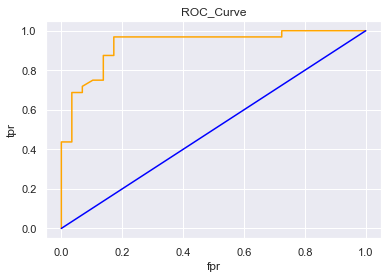

In [262]:
# we already know that this metric is comparision if tpr vs fpr

# Importing relevant library
import matplotlib.pyplot as plt

# Plotting graph for comaparision
plt.plot(fpr,tpr,c='orange')

# connecting the corners to find the area between the curve easily
plt.plot([0,1],[0,1],c='blue',linestyle='solid')

# Customizing the graph
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC_Curve')

In [263]:
# Now finally to get the area under the curve
np.random.seed(25)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_proba_positive)

0.9304956896551724

# Confusion Matrix

In [264]:
!pip install seaborn

<AxesSubplot:>

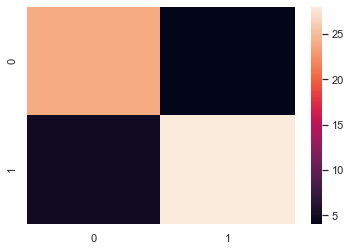

In [265]:
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
y_predict=clf.predict(x_test)
conf_mat=confusion_matrix(y_predict,y_test)
sns.heatmap(conf_mat)

In [266]:
ne=pd.read_csv('P12-SalaryData.csv')
ne.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Confusion Matrix**

A confusion matrix is a quick way to compare the labels the model prdicts and the actual it is suppose to predict

In [267]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
cm=confusion_matrix(y_test,y_preds)
cm

array([[24,  5],
       [ 4, 28]], dtype=int64)

Text(30.5, 0.5, 'Predicted values')

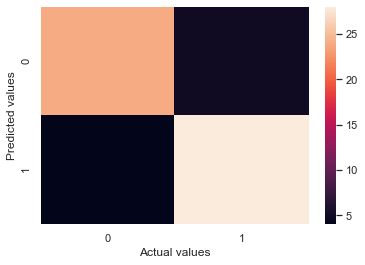

In [268]:
# Heat map
sns.heatmap(cm)

# Visualization
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Classification Report

In [269]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



**Precision**: No False Positives

**Recall**   : No False Negatives

**F1 Score** : Combination of precision and Recall

# Evaluating a Regression model

Most common regression evaluaation techniques are:
  
1) R^2 or Coefficient of determination

2) Mean absolute error (MAE)

3) Mean Squared error(MSE)

In [270]:
# Get the data and fit a regression Model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(25)

x=boston_df.drop('targets',axis=1)
y=boston_df['targets']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

y_preds=model.predict(x_test)
model.score(x_test,y_test)

0.8213484449305969

In [271]:
# R^2 
from sklearn.metrics import r2_score
r2_score(y_test,y_preds)

# We can see both the r2 and score are same

0.8213484449305969

In [272]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_preds)
mae

2.3689019607843136

In [273]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_preds)
mse

12.184987352941178

# b) Evaluating with a cross validation  and scoring parameter

In [274]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(25)

#data
x=hd.drop('target',axis=1)
y=hd['target']

#Using cross validation score
clf=RandomForestClassifier(n_estimators=100)
c_val=cross_val_score(clf,x,y,cv=5,scoring=None)
c_val

array([0.81967213, 0.86885246, 0.83606557, 0.81666667, 0.76666667])

In [275]:
# Accuracy
np.mean(c_val)

0.8215846994535518

In [276]:
# Using format method (just for understanding )
print(f'The accuracy is:{np.mean(c_val)*100:.2f}%')

The accuracy is:82.16%


# Now we will use `accuracy` as scoring parameter

In [277]:
np.random.seed(25)
clf=RandomForestClassifier(n_estimators=100)
c_val=cross_val_score(clf,x,y,cv=5,scoring='accuracy')
print(f'The accuracy is:{np.mean(c_val)*100:.2f}%')

The accuracy is:82.16%


# Now we will use `precision` as scoring parameter

In [278]:
np.random.seed(25)
clf=RandomForestClassifier(n_estimators=100)
c_val=cross_val_score(clf,x,y,cv=5,scoring='precision')
print(f'The accuracy is:{np.mean(c_val)*100:.2f}%')

The accuracy is:83.48%


# Now we will use `Recall` as scoring parameter

In [279]:
np.random.seed(25)
clf=RandomForestClassifier(n_estimators=100)
c_val=cross_val_score(clf,x,y,cv=5,scoring='recall')
print(f'The accuracy is:{np.mean(c_val)*100:.2f}%')

The accuracy is:84.24%


# Now we will use `f1-score` as scoring parameter

In [280]:
np.random.seed(25)
clf=RandomForestClassifier(n_estimators=100)
c_val=cross_val_score(clf,x,y,cv=5,scoring='f1')
print(f'The accuracy is:{np.mean(c_val)*100:.2f}%')

The accuracy is:83.78%


# Up until now we have done for Random Forest Classifier, let us do it for Random Forest Regressor

In [281]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,targets
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [282]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(25)

x=boston_df.drop('targets',axis=1)
y=boston_df['targets']

model=RandomForestRegressor(n_estimators=100)
c_val1=cross_val_score(model,x,y,cv=5,scoring=None)
c_val1

array([0.7645655 , 0.85647474, 0.73224204, 0.49086358, 0.246592  ])

In [283]:
np.mean(c_val1)
print(f'The accuracy is:{np.mean(c_val1)*100:.2f}%')

The accuracy is:61.81%


# Now we will use `Mean Absolute Error` as scoring parameter

In [284]:
np.random.seed(25)
model=RandomForestRegressor(n_estimators=100)
c_val_mae=cross_val_score(model,x,y,cv=5,scoring='neg_mean_absolute_error')
print(f'The Mean error is:{np.mean(c_val_mae)}')

The Mean error is:-2.999139526305571


# Now we will use `Mean Squared Error` as scoring parameter

In [285]:
np.random.seed(25)
model=RandomForestRegressor(n_estimators=100)
c_val_mse=cross_val_score(model,x,y,cv=5,scoring='neg_mean_squared_error')
print(f'The Mean error is:{np.mean(c_val_mse)}')

The Mean error is:-21.465997021257998


# Now we will use `r^2(R-sqaured)` as scoring parameter

In [286]:
np.random.seed(25)
model=RandomForestRegressor(n_estimators=100)
c_val_r2=cross_val_score(model,x,y,cv=5,scoring='r2')
print(f'The Mean error is:{np.mean(c_val_r2)}')

The Mean error is:0.6181475720949885


# c) Evaluating using Metric functions

**Classification Metric Functions**

In [310]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(25)

x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)

y_preds=clf.predict(x_test)

print('Classification metrics of Heart Disease DataSet\n\n')
print(f'Accuracy Score    :{accuracy_score(y_test,y_preds)*100}%')
print(f'Precision Score   :{precision_score(y_test,y_preds)*100}%')
print(f'Recall Score      :{recall_score(y_test,y_preds)*100}%')
print(f'F1 Score          :{f1_score(y_test,y_preds)*100}%')

Classification metrics of Heart Disease DataSet


Accuracy Score    :78.68852459016394%
Precision Score   :77.14285714285715%
Recall Score      :84.375%
F1 Score          :80.59701492537314%


**Regression Metric Functions**

In [288]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(25)

x=boston_df.drop('targets',axis=1)
y=boston_df['targets']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)

model.fit(x_train,y_train)

y_preds=model.predict(x_test)

print('Regression metrics of Heart Disease DataSet\n\n')
print(f'mean_squared_error         :{mean_squared_error(y_test,y_preds)}')
print(f'mean_absolute_error        :{mean_absolute_error(y_test,y_preds)}')
print(f'explained_variance_score   :{explained_variance_score(y_test,y_preds)*100}%')
print(f'r2_score                   :{r2_score(y_test,y_preds)*100}%')

Regression metrics of Heart Disease DataSet


mean_squared_error         :12.184987352941178
mean_absolute_error        :2.3689019607843136
explained_variance_score   :82.14100916195726%
r2_score                   :82.13484449305969%


# Now we need to improve the model

# This can be done by using Hyper parameter Fine Tuning

This is basically the inclusion of the validation set

Now we have training set, vaidation set and test set

Now this can be done in three ways:
1) By Hand

2) By RandomSearchCV

3) By GridSearchCV

# Hyper parameters by hand

In [289]:
clf.get_params() 
# These are the hyperparameters for the classifier

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Now we can filter the best hyper paramters so that we can check for everything
Lets us check the top hyperparamters

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [290]:
def evae_score(y_test,y_preds):
    accuracy=accuracy_score(y_test,y_preds)
    precision=precision_score(y_test,y_preds)
    recall=recall_score(y_test,y_preds)
    f1=f1_score(y_test,y_preds)
    print(f'Accuracy Score    :{accuracy*100}%')
    print(f'Precision Score   :{precision*100}%')
    print(f'Recall Score      :{recall*100}%')
    print(f'F1 Score          :{f1*100}%')


In [291]:
from sklearn.ensemble import RandomForestClassifier

# For more effective solution, try to randomize the entire set
hd_shuffled=hd.sample(frac=1)

x=hd_shuffled.drop('target',axis=1)
y=hd_shuffled['target']

#split the data into validation, train and test splits using the shuffled dataset

train_split=round(0.7* len(hd_shuffled)) # 70% of data
valid_split=round(train_split+0.15*len(hd_shuffled)) #15% of data

x_train,y_train=x[:train_split],y[:train_split]

x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]

x_test,y_test=x[valid_split:],y[valid_split:]

len(x_train),len(x_valid),len(x_test)

(212, 45, 46)

In [292]:
np.random.seed(25)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_preds=clf.predict(x_valid)

baseline_metrics=evae_score(y_valid,y_preds)
baseline_metrics

Accuracy Score    :84.44444444444444%
Precision Score   :90.47619047619048%
Recall Score      :79.16666666666666%
F1 Score          :84.44444444444444%


# Now we perform for the same model with different hyperparameters

In [293]:
np.random.seed(25)
clf1=RandomForestClassifier(n_estimators=100,min_samples_split=2)
clf1.fit(x_train,y_train)
y_preds1=clf1.predict(x_valid)

clf1_score=evae_score(y_valid,y_preds1)
clf1_score

Accuracy Score    :84.44444444444444%
Precision Score   :90.47619047619048%
Recall Score      :79.16666666666666%
F1 Score          :84.44444444444444%


# Hyperparameters by Randomsearch CV

In [294]:
from sklearn.model_selection import RandomizedSearchCV

# Now we create the dictionary of the hyperparameters

grid={'max_depth':[None,5,10,20,30],
    'max_features':['auto','sqrt'],
    'min_samples_leaf':[1,2,3,4],
    'min_samples_split':[2,3,4,5],
    'n_estimators':[50,100,200,300,400]
    }

np.random.seed(25)
# Now we import the data

x=hd_shuffled.drop('target',axis=1)
y=hd_shuffled['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the RandomForest Classifier

clf=RandomForestClassifier(n_jobs=1)

# Set up Random Search CV

rs_clf=RandomizedSearchCV(estimator=clf,
                      param_distributions=grid,
                      n_iter=10,
                      cv=5,
                      verbose=2)
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   1.2s
[CV] n_estimators=300, min_samples_split=2, min_

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=None, total=   0.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=None, total=   0.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=None, total=   0.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=None, total=   0.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=None, total=   0.4s
[CV] n_estimators=100, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   41.0s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   verbose=2)

In [295]:
# Now we extract the best possible parametrs from the above outputs
rs_clf.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10}

In [296]:
# we make the predictions with the best Hyper parameters
rs_y_preds=rs_clf.predict(x_test)

# Now we make the prediction
rs_metrics=evae_score(y_test,rs_y_preds)

Accuracy Score    :88.52459016393442%
Precision Score   :88.09523809523809%
Recall Score      :94.87179487179486%
F1 Score          :91.35802469135803%


# Hyperparameters with GridSearch CV

In [297]:
grid

{'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [2, 3, 4, 5],
 'n_estimators': [50, 100, 200, 300, 400]}

    Here in grid search cv it will check all the possibilities unlike random search which checks only limited.
    So we can make the sizes a tad bit smaller for the fast output. Although we can select evrything if the hard disk supports for larger data sets.

# Now finally putting it all together!

Here we are going to learn about sklearn pipeline, please use below url
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [298]:
# Get the data
data= pd.read_csv('car-sales-extended-missing-data.csv')
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [299]:
# Check the data types of each column
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [300]:
# Now check for the NAN values or Missing values 
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# Things to Remember

* All data should be Numerical
* There should be no missing values
* Manipulate the test set, same as the trained set
* Never test the data which you have already trained on
* Tune Hyper parameters on validation set (or) use cross validation
* one best performance metric doesn't mean it is the best model

# Steps we want to do in below cell
* Fill the missing values
* Convert data into numbers( by one hot encoder or dummy values)
* Model our data

**Pipeline**
* It is basically arranging different process in a pipeline, and defining which steps to perform in order.
* The Steps contain tuple values

In [305]:
# getting the data ready
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# RandomSeed
np.random.seed(25)

# import the data
data=pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'],inplace=True)

# Define Different features and transform pipeline
# Here we have to define all the different features like categorical & numerical and fill it with the dummy values
categorical_features=['Make','Colour']
categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                                       ('oneHot',OneHotEncoder(handle_unknown='ignore'))])

door_feature=['Doors']
door_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value=4))])

numeric_feature=['Odometer (KM)']
numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean'))])

# Setting up preprocessing steps (fill missing values and convert them to numbers)

preprocessor= ColumnTransformer(transformers=[('cat',categorical_transformer,categorical_features),
                                              ('door',door_transformer,door_feature),
                                              ('odometer',numeric_transformer,numeric_feature)])


# Creating a pipeline and modelling steps
model=Pipeline(steps=[('preprocessor',preprocessor),
                     ('model',RandomForestRegressor())])

# Split data
x=data.drop('Price',axis=1)
y=data['Price']

# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model.fit(x_train,y_train)
baseline_metrics=model.score(x_test,y_test)
baseline_metrics

0.3283522576968587

In [302]:
# Now we improvise the above model using hyperparameter fine tuning

from sklearn.model_selection import GridSearchCV
pipe_grid={
    'preprocessor__odometer__imputer__strategy':['mean','median'],
    'model__n_estimators':[100,200],
    'model__min_samples_split':[1,2],
    'model__max_depth':[None,5],
    'model__max_features':['auto']
}

gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\jobl

[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 
[CV]  model__max_depth=

C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=100, preprocessor__odometer__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median 


C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=1, model__n_estimators=200, preprocessor__odometer__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_feat

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   38.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('oneHot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [307]:
gs_model.best_params_
# Checking the best parameters abtained from above fine tuning

{'model__max_depth': 5,
 'model__max_features': 'auto',
 'model__min_samples_split': 2,
 'model__n_estimators': 200,
 'preprocessor__odometer__imputer__strategy': 'median'}

In [306]:
gs_model.score(x_test,y_test)
# As we can see the model has performed a tad bit better

0.3875247407177823

# Now that we finally have wings

# Let's Play!!!

In [323]:
# We will use all the other models to try and check in between the outputs

from sklearn.linear_model import LogisticRegression                     # Logistic Regression( It is a classifier)
from sklearn.svm import SVC                                             # Support Vector Machine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier                      # K -Nearest Neighbors
from sklearn.gaussian_process import GaussianProcessClassifier          # Gaussian Process Classifier
from sklearn.tree import DecisionTreeClassifier                         # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier,   # Random Forest and AdaBoost Classifiers
from sklearn.naive_bayes import GaussianNB                              # Gaussian Naive bayes Classifier

In [319]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [342]:
# data
x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_preds=clf.predict(x_test)

clf.score(x_test,y_test)

0.8524590163934426

In [376]:
models = {
          'LinearSVC': LinearSVC(),
          'KNN': KNeighborsClassifier(),
          'SVC': SVC(),
          'LogisticRegression': LogisticRegression(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GaussianProcess Classifier':GaussianProcessClassifier(),
          'Decision Tree':DecisionTreeClassifier(),
          'Ada Boost': AdaBoostClassifier(),
          'Gaussian Naive bayes':GaussianNB()
         }
np.random.seed(25)
# Create an empty dictionary called results
results = {}
A=list(models.values())
B=[]
for i in A:
    clf=A[0]
    clf.fit(x_train,y_train)
    B.append(clf.score(x_test,y_test))
B
D=pd.DataFrame(B,list(models.keys()))
D

C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\shanm\Desktop\MiniConda\sampleproject\e

,0
LinearSVC,0.491803
KNN,0.672131
SVC,0.639344
LogisticRegression,0.836066
RandomForestClassifier,0.918033
GaussianProcess Classifier,0.803279
Decision Tree,0.639344
Ada Boost,0.672131
Gaussian Naive bayes,0.836066


<AxesSubplot:>

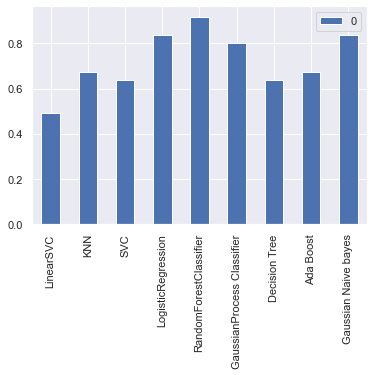

In [378]:
#Lets Plot the output for better view

D.plot.bar()

In [ ]:
# We will now perform hyper parameter fine tuning for improving the model

from sklearn.model_selection import GridSearchCV
